<a href="https://colab.research.google.com/github/KubraErensoy/BTK-DATASCIENCE/blob/main/ML_Regression_code4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Machine Learning**



* Makine Öğrenmesi, insanların öğrenme şeklini taklit etmek için veri ve algoritmaların kullanımına
odaklanan ve doğruluğunu kümülatif olarak arttıran bir Yapay Zeka ve Bilgisayar Bilimi dalıdır.

*  Makina Öğrenme Tipleri:

**1.   Gözetimli Öğrenme(Supervised Learning);** etiketlenmiş veri 
kümelerini bağımlı ve bağımsız değişkenler 
kullanarak işleme sokan makine öğrenmesi 
algoritmalarını içerir.

**2.   Gözetimsiz Öğrenme(Unsupervised Learning);**etiketlenmemiş veri kümelerini 
analiz etmek ve kümelemek için 
makine öğrenimi algoritmalarını 
kullanır.

**3.   Pekiştirmeli Öğrenme(Reinforcement Learning)**;amaca yönelik olarak, ajanların açık hedefler 
belirleyerek öğrenme gerçekleştirdiği Makine 
Öğrenmesi çeşididir. 








**1.Regresyon**

İki yada daha çok değişken arasındaki ilişkiyi ölçmek için kullanılan analiz modelidir.


*   Basit Doğrusal Regresyon
*   Çoklu Doğrusal Regresyon
*   Polinomsal Regresyon









**Basit Doğrusal Regresyon**

*   Bir tane bağımsız değişkenin olduğu durumda kullanılan 
Regresyon çeşididir.
*   Bağımlı ve Bağımsız değişkenin olduğu regresyon çeşididir.





In [1]:
#Kütüphaneyi içe aktar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#Sklearn kütüphanesi içe aktar
from sklearn.linear_model import LinearRegression



In [4]:
#veriyi içe aktar
df=pd.read_csv("dogrusal_regresyon_veriseti.csv",sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


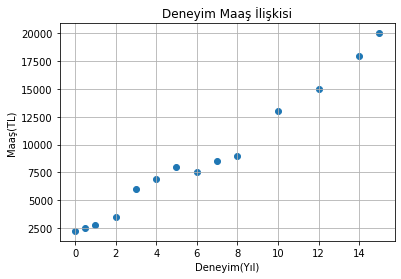

In [5]:
#veriyi görselleştir
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim(Yıl)")
plt.ylabel("Maaş(TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [6]:
#Doğrusal Regresyon Modeli Eğitimi

#Doğrusal Regresyon Modeli
lineer_reg=LinearRegression()

#data içerisindeki bulunan maas ve deneyim sutunlarını numpy array'e çevir
x=df.deneyim.values.reshape(-1,1)
y=df.maas.values.reshape(-1,1)

#doğrusal regresyon eğitimi
lineer_reg.fit(x,y)

LinearRegression()

In [7]:
#y ekseninin kestiği nokta intercept bulunması
y_ekseni_kesisim = np.array([0]).reshape(-1,1)
b0 = lineer_reg.predict(y_ekseni_kesisim)
print("B0 :", b0)

#y eksenini kestiği nokta(intercept)
b0_ = lineer_reg.intercept_
print("b0_ :", b0_)

#eğim(slope) bulunması
b1 = lineer_reg.coef_
print("b1 :", b1)


B0 : [[1663.89519747]]
b0_ : [1663.89519747]
b1 : [[1138.34819698]]


In [9]:
#maas= 1663+1138*deneyim
# y eksenini kestiği nokta ve eğime göre doğrusal model oluşturulur.

deneyim = 11 #11 yıllık deneyim

#11 yıllık deneyime sahip birinin maaşı tahmin edilir.
maas_yeni = 1663+1138*deneyim
print(maas_yeni)

#11 yıllık deneyime sahip birinin maaşı predict metodu ile tahmin edilir
sonuc = lineer_reg.predict(np.array([deneyim]).reshape(-1,1))
print("11 Yıllık Deneyime sahip birinin maaşı : {}".format(sonuc[0]))

14181
11 Yıllık Deneyime sahip birinin maaşı : [14185.72536421]


**Basit Doğrusal Regresyon Modeli ile Test/Tahmin/Görselleştirme**

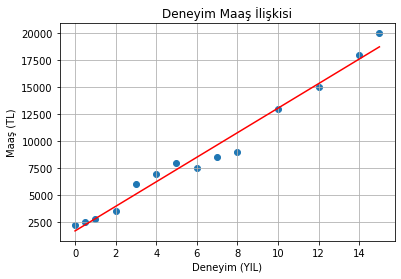

In [10]:
#Doğrusal Regresyon Modeli ile Test/Tahmin/Görselleştirme 
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)

plt.figure()
plt.scatter(x,y)

#0-15 yılları arasında deneyime sahip insanların maaşı tahmin edilir
y_head = lineer_reg.predict(array)

plt.plot(array, y_head, color ="red") #(deneyim,maaş)
plt.xlabel("Deneyim (YIL)")
plt.ylabel("Maaş (TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

**Çoklu Doğrusal Regresyon**


* Birden fazla bağımsız değişkenin olduğu durumda kullanılan 
Regresyon çeşididir



In [11]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv("coklu_dogrusal_regresyon_veriseti.csv",sep=";")
df.head()

,deneyim,maas,yas
0,0.5,2500,22
1,0.0,2250,21
2,1.0,2750,23
3,5.0,8000,25
4,8.0,9000,28


In [13]:
x = df.iloc[:,[0,2]].values #deneyim ve yaşı bağımsız değişkenler olarak alır
x

array([[ 0.5, 22. ],
       [ 0. , 21. ],
       [ 1. , 23. ],
       [ 5. , 25. ],
       [ 8. , 28. ],
       [ 4. , 23. ],
       [15. , 35. ],
       [ 7. , 29. ],
       [ 3. , 22. ],
       [ 2. , 23. ],
       [12. , 32. ],
       [10. , 30. ],
       [14. , 34. ],
       [ 6. , 27. ]])

In [14]:
y = df.maas.values.reshape(-1,1)# maaş'ı ise bağımlı değişken olarak alalım
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]])

In [15]:
#Çoklu Doğrusal Regresyon Modeli
coklu_dogrusal_regresyon = LinearRegression()

#Çoklu Doğrusal Regresyon Eğitimi
coklu_dogrusal_regresyon.fit(x,y)

LinearRegression()

In [16]:
#test 1
test_verisi1 = np.array([[10,35]]) #deneyim=10 ve yaş=35
test_sonucu1 = coklu_dogrusal_regresyon.predict(test_verisi1)
print("10 Yıllık Deneyim ve 35 yaş sonucu çıkan maaş : {} TL".format(test_sonucu1))


10 Yıllık Deneyim ve 35 yaş sonucu çıkan maaş : [[11046.35815877]] TL


In [17]:
#test 2
test_verisi2 = np.array([[5,35]]) 
test_sonucu2 = coklu_dogrusal_regresyon.predict(test_verisi2)
print("5 Yıllık Deneyim ve 35 yaş sonucu çıkan maaş : {} TL".format(test_sonucu2))


5 Yıllık Deneyim ve 35 yaş sonucu çıkan maaş : [[3418.85455609]] TL


**Polinomsal Regresyon**

*  Bağımsız değişken x ile bağımlı değişken y arasındaki ilişkinin x'te
n'inci dereceden bir polinom olarak modellendiği bir Regresyon çeşididir




In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [20]:
df = pd.read_csv("polinomsal_regresyon_veriseti.csv", sep = ";")
df.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [21]:
#sklearn input olarak genelde numpy kabul eder
y = df.araba_max_hiz.values.reshape(-1,1) #numpy array'e çevir
x = df.araba_fiyat.values.reshape(-1,1) #numpy array'e cevir

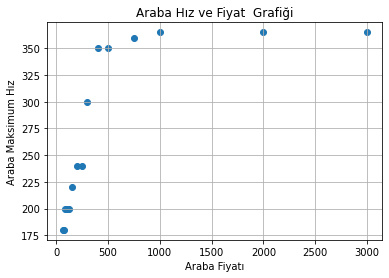

In [23]:
#veriyi görselleştir
plt.scatter(x,y)
plt.ylabel("Araba Maksimum Hız")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat  Grafiği")
plt.grid()
plt.show()

In [24]:
#Doğrusal Regresyon Modeli
lr = LinearRegression()

#Doğrusal regresyon eğitimi
lr.fit(x,y)

LinearRegression()

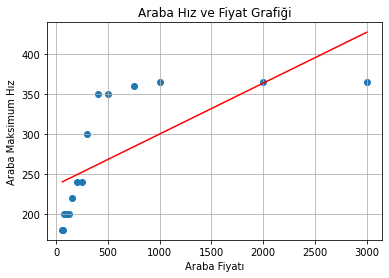

10 Milyon TL'lik Bir aracın Hızı :  [[871.66401826]]


In [25]:
#%% tahmin
y_tahmin = lr.predict(x)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="red")
plt.ylabel("Araba Maksimum Hız")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat Grafiği")
plt.grid(True)
plt.show()

araba_fiyat = 10000
print("10 Milyon TL'lik Bir aracın Hızı : ",lr.predict((np.array([araba_fiyat]).reshape(-1,1))))

In [33]:
#polinomsal regresyon - y = b0 + b1*x + b2*x^2 + b3*x^3 +... + bn*x^n

#ploinomsal özellikler
polinomsal_regresyon = PolynomialFeatures(degree= 4) # 4. dereceden polinom

x_polinom = polinomsal_regresyon.fit_transform(x)
x_polinom
#çıktılar sırasıyla b0 + b1*x + b2*x^2 + b3*x^3 + ... + bn*x^n  -> n=4 için

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

In [34]:
# %% polinomsal regresyon eğitebilmek için polinomsal özellikler ile
lr2 = LinearRegression()
lr2.fit(x_polinom,y)

LinearRegression()

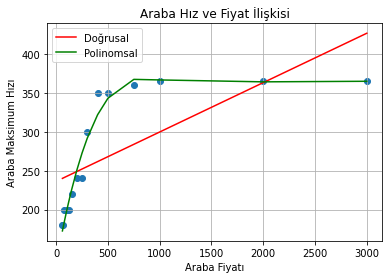

In [35]:
# tahmin
y_tahmin2 = lr2.predict(x_polinom)

plt.scatter(x,y)
plt.plot(x,y_tahmin,color="r",label="Doğrusal")
plt.plot(x,y_tahmin2,color="g",label="Polinomsal")
plt.legend()
plt.ylabel("Araba Maksimum Hızı")
plt.xlabel("Araba Fiyatı")
plt.title("Araba Hız ve Fiyat İlişkisi")
plt.grid(True)
plt.show()

**R Kare ile Regresyon Modellerinin Değerlendirilmesi**


*   R kare(R2),Regresyo denklemi ile belirlenen bağımlı değişkenlerin toplam değişkenliğe oranıdır.




In [36]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import r2_score #r kare

In [37]:
df = pd.read_csv("dogrusal_regresyon_veriseti.csv", sep=";")
df.head()

,deneyim,maas
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


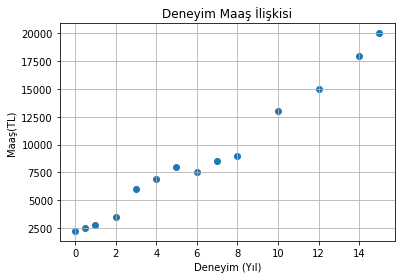

In [38]:
plt.scatter(df.deneyim,df.maas)
plt.xlabel("Deneyim (Yıl)")
plt.ylabel("Maaş(TL)")
plt.title("Deneyim Maaş İlişkisi")
plt.grid(True)
plt.show()

In [39]:
#data içerisindeki bulunan maas ve deneyim sutunlarını numpy array'e çevir
x = df.deneyim.values.reshape(-1,1)
y = df.maas.values.reshape(-1,1)

In [41]:
#Doğrusal Regresyon Modeli Eğitimi
lineer_reg = LinearRegression()
lineer_reg.fit(x,y)

LinearRegression()

In [42]:
#Polinomsal REgresyon Modeli Eğitimi
polinomsal_regresyon = PolynomialFeatures(degree= 2)

x_polinom = polinomsal_regresyon.fit_transform(x)

# %% polinomsal regresyon eğitebilmek için polinomsal özellikler
poly_reg = LinearRegression()
poly_reg.fit(x_polinom,y)

LinearRegression()

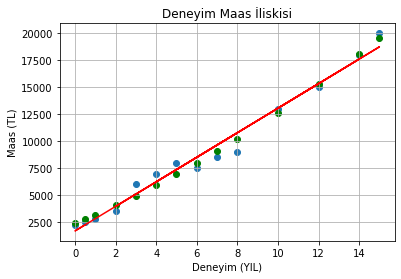

In [44]:
#test
y_tahmin_lineer = lineer_reg.predict(x)
y_tahmin_poly = poly_reg.predict(x_polinom)

plt.scatter(df.deneyim,df.maas)
plt.plot(x,y_tahmin_lineer,color="red",label="Doğrusal") #(deneyim,maaş)
plt.scatter(x,y_tahmin_poly, color="g",label="Polinomsal") #(deneyim,maaş)
plt.xlabel("Deneyim (YIL)")
plt.ylabel("Maas (TL)")
plt.title("Deneyim Maas İliskisi")
plt.grid(True)
plt.show()